In [3]:
"""Example script to run the GRBModelling class
on the data from the GRB190114C detected by the MAGIC Collaboration

Author: Carlo Romoli (MPIK)
"""

import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, hstack
import astropy.units as u
from astropy.io import ascii
import naima

from grbloader import *

from naima.models import (ExponentialCutoffPowerLaw, Synchrotron,
                          InverseCompton)
from astropy.constants import c
import astropy.units as u
import matplotlib.pyplot as plt




AttributeError: 'Synchrotron' object has no attribute 'compute_Etot'

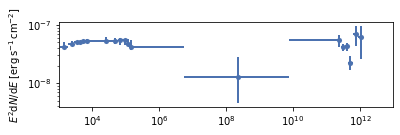

In [4]:
def main():
    # Open the file and format the table in order to be properly read by the script
    tab = ascii.read("magic_int1_points.txt")
    newt = Table([tab['energy'], tab['flux'], tab['flux_hi']-tab['flux'], tab['flux']-tab['flux_lo']],
                 names=['energy', 'flux', 'flux_error_hi', 'flux_error_lo'])

    Eiso = 8e53   # erg
    density = 0.5  # cm-3
    redshift = 0.4245
    tstart = 68   # s
    tstop = 110   # s

    """
    Initialize the GRBModelling class with the data and the given parameters
    """
    magicgrb = GRBModelling(Eiso, density, [newt], tstart, tstop, redshift,
                            [-1.44, -1.62,  3.17,  1.32,  0.29],
                            ['log10(eta_e)', 'log10(Ebreak)', 'Index2', 'log10(Ec)', 'log10(B)'],
                            scenario='ISM',
                            cooling_constrain=False)

    """ 
    Load the NAIMA interactive fitter (optional) 
    """
    naima.InteractiveModelFitter(magicgrb.naimamodel,magicgrb.pars,data = magicgrb.dataset,labels=magicgrb.labels)

    """ 
    Run the fitting routine 
    """
    testrun = magicgrb.run_naima("quickrun", 64, 50, 100, 2, prefit=False)
    # testrun = naima.read_run("quickrun_chain.h5", magicgrb.naimamodel)  # to reload a previous fit using NAIMA function

    pars = [np.mean(a) for a in testrun.flatchain.T]  # read the parameter distributions and save the median
    magicgrb.pars = pars

    """
    Load and plot the results
    """
    newene = Table([np.logspace(-1, 13, 500)*u.eV], names=['energy'])  # define a new energy axis
    naima.plot_data(magicgrb.dataset)  # plot the dataset
    model = magicgrb.naimamodel(magicgrb.pars, newene)[0]  # load the model curve for the new energy axis
    plt.loglog(newene, model, 'k-', label="TOT", lw=3, alpha=0.3)
    plt.loglog(newene, magicgrb.synch_comp, 'k--', alpha=0.5, label="Synch.")
    plt.loglog(newene, magicgrb.ic_comp, 'k-.', alpha=0.5, label="IC no abs.")
    plt.loglog(newene, magicgrb.ic_compGG, 'k:', alpha=0.5, label="IC abs. method 1")

    """
    Compute and plot the confidence interval
    Here a protected member of naima is used. This allows to compute the
    confidence interval for an arbitrary energy range (see NAIMA documentation)
    """
    newene = [1e-4*u.eV, 1e13*u.eV]
    a, b = naima.plot._calc_CI(testrun, confs=[1], modelidx=0, e_range=newene)  # access the confidence interval directly
    xval = a.value
    ymax1 = b[0][1].value  # 1 sigma
    ymin1 = b[0][0].value  # 1 sigma
    plt.fill_between(xval,
                     ymax1,
                     ymin1,
                     alpha=0.2,
                     color='C0',
                     label="1$\sigma$")  # plot

    plt.ylim(0.9e-9, 1.1e-7)
    plt.xlim(1e3, 1e13)
    plt.xlabel("Energy [eV]", size=13)
    plt.ylabel("$E^2\mathrm{d}N/\mathrm{d}E$ [$\mathrm{erg\,s^{-1}\,cm^{-2}}$]", size=13)
    ax = plt.gca()
    ax.tick_params(axis='both', labelsize=12)
    plt.legend()

    plt.show()


if __name__ == '__main__':
    main()

In [1]:
"""Example script to run the GRBModelling class
on the data from the GRB190114C detected by the MAGIC Collaboration

Author: Carlo Romoli (MPIK)
"""

import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, hstack
import astropy.units as u
from astropy.io import ascii
import naima

from grbloader import *


In [5]:
# Open the file and format the table in order to be properly read by the script
tab = ascii.read("magic_int1_points.txt")
newt = Table([tab['energy'], tab['flux'], tab['flux_hi']-tab['flux'], tab['flux']-tab['flux_lo']],
            names=['energy', 'flux', 'flux_error_hi', 'flux_error_lo'])

Eiso = 8e53   # erg
density = 0.5  # cm-3
redshift = 0.4245
tstart = 68   # s
tstop = 110   # s

In [6]:
magicgrb = GRBModelling(8e53, 0.5, [newt], 68, 110, 0.4245,
                        [-1.44, -1.62,  3.17,  1.32,  0.29],
                        ['log10(eta_e)', 'log10(Ebreak)', 'Index2', 'log10(Ec)', 'log10(B)'],
                        scenario='ISM',
                        cooling_constrain=False)

In [7]:
print(GRBModelling.gammaval(magicgrb))
print(magicgrb.Eiso)


None
8e+53


In [3]:
"""
Initialize the GRBModelling class with the data and the given parameters
"""
magicgrb = GRBModelling(8e53, 0.5, [newt], 68, 110, 0.4245,
                        [-1.44, -1.62,  3.17,  1.32,  0.29],
                        ['log10(eta_e)', 'log10(Ebreak)', 'Index2', 'log10(Ec)', 'log10(B)'],
                        scenario='ISM',
                        cooling_constrain=False)

""" 
Load the NAIMA interactive fitter (optional) 
"""
# naima.InteractiveModelFitter(magicgrb.naimamodel,magicgrb.pars,data = magicgrb.dataset,labels=magicgrb.labels)

""" 
Run the fitting routine 
"""
testrun = magicgrb.run_naima("quickrun", 64, 50, 100, 2, prefit=False)
# testrun = naima.read_run("quickrun_chain.h5", magicgrb.naimamodel)  # to reload a previous fit using NAIMA function


UnitConversionError: Can only apply 'greater' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan).

In [4]:
pars = [np.mean(a) for a in testrun.flatchain.T]  # read the parameter distributions and save the median
magicgrb.pars = pars
"""
Load and plot the results
"""
newene = Table([np.logspace(-1, 13, 500)*u.eV], names=['energy'])  # define a new energy axis
naima.plot_data(magicgrb.dataset)  # plot the dataset
model = magicgrb.naimamodel(magicgrb.pars, newene)[0]  # load the model curve for the new energy axis
plt.loglog(newene, model, 'k-', label="TOT", lw=3, alpha=0.3)
plt.loglog(newene, magicgrb.synch_comp, 'k--', alpha=0.5, label="Synch.")
plt.loglog(newene, magicgrb.ic_comp, 'k-.', alpha=0.5, label="IC no abs.")
plt.loglog(newene, magicgrb.ic_compGG, 'k:', alpha=0.5, label="IC abs. method 1")

NameError: name 'testrun' is not defined

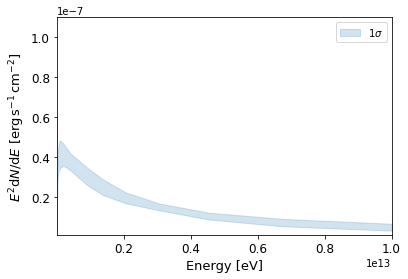

In [6]:
"""
Compute and plot the confidence interval
Here a protected member of naima is used. This allows to compute the
confidence interval for an arbitrary energy range (see NAIMA documentation)
"""
newene = [1e-4*u.eV, 1e13*u.eV]
a, b = naima.plot._calc_CI(testrun, confs=[1], modelidx=0, e_range=newene)  # access the confidence interval directly
xval = a.value
ymax1 = b[0][1].value  # 1 sigma
ymin1 = b[0][0].value  # 1 sigma
plt.fill_between(xval,
                    ymax1,
                    ymin1,
                    alpha=0.2,
                    color='C0',
                    label="1$\sigma$")  # plot

plt.ylim(0.9e-9, 1.1e-7)
plt.xlim(1e3, 1e13)
plt.xlabel("Energy [eV]", size=13)
plt.ylabel("$E^2\mathrm{d}N/\mathrm{d}E$ [$\mathrm{erg\,s^{-1}\,cm^{-2}}$]", size=13)
ax = plt.gca()
ax.tick_params(axis='both', labelsize=12)
plt.legend()

plt.show()

# ---------------------------------------------- TEST --------------------------------------------------------

In [2]:
ECPL = naima.models.ExponentialCutoffPowerLaw(

    1e36 * u.Unit("1/eV"), 1 * u.TeV, 2.1, 13 * u.TeV

)

IC = naima.models.InverseCompton(ECPL, seed_photon_fields=["CMB"])
IC.particle_distribution.index = 1.8

print(ECPL.index)
1.8

1.8


1.8

In [3]:
SYN = naima.models.Synchrotron(ECPL, B=100 * u.uG)

SYN.particle_distribution is IC.particle_distribution
spectrum_energy = np.logspace(-1, 14, 1000) * u.eV

sed_IC = IC.sed(spectrum_energy, distance=1.5 * u.kpc)

sed_SYN = SYN.sed(spectrum_energy, distance=1.5 * u.kpc)

In [4]:
import naima
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

In [27]:

# Definiamo i parametri del modello
amplitude = 1.0
e_0 = 1.0 * u.TeV  # Energia di riferimento
alpha_1 = 2.0
alpha_2= 2.5
e_cut= 20*u.TeV
e_break= 3.0*u.TeV

# Creiamo un'istanza della classe
PL= naima.models.PowerLaw(amplitude, e_0, alpha_1)
ECPL=naima.models.ExponentialCutoffPowerLaw(amplitude, e_0, alpha_1,e_cut)

BPL=naima.models.BrokenPowerLaw(amplitude, e_0,e_break, alpha_1, alpha_2)
ECBPL=naima.models.ExponentialCutoffBrokenPowerLaw(amplitude, e_0,e_break, alpha_1, alpha_2,e_cut)


In [22]:
print(BPL._calc(20.0*u.TeV))

0.0009682458365518542


<function matplotlib.pyplot.show(*args, **kw)>

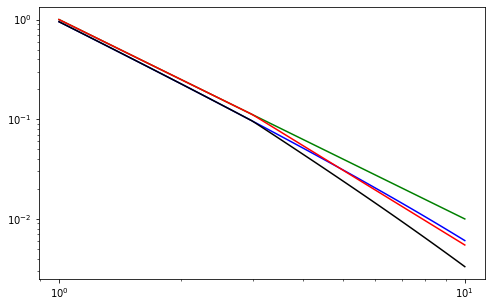

In [28]:
energy_values = np.logspace(0, 1, 100) * u.TeV  # Da 0.1 a 100 TeV

flux1=PL(energy_values)
flux2=ECPL(energy_values)
flux3=BPL(energy_values)
flux4=ECBPL(energy_values)
plt.figure(figsize=(8,5))
plt.plot(energy_values,flux1,color="green")
plt.plot(energy_values,flux2,color="blue")
plt.plot(energy_values,flux3,color="red")
plt.plot(energy_values,flux4,color="black")
plt.xscale('log')
plt.yscale('log')
plt.show


In [36]:
energy = 20.0 * u.eV  # Energia in unità fisiche
result = PL._calc(energy)
print(f"Risultato con _calc: {result}")


Risultato con _calc: 2.5000000000000005e+21


In [37]:
print(PL.eval(energy,amplitude,e_0,alpha))

0.0025 TeV2 / eV2


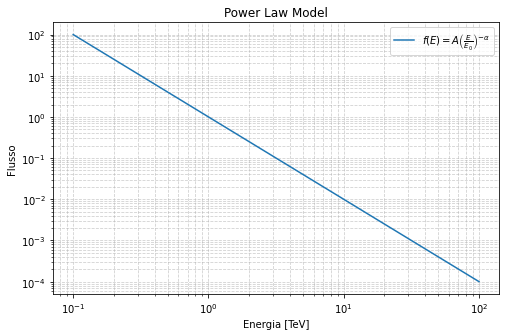

In [19]:
# Generiamo valori di energia su scala logaritmica
energy_values = np.logspace(-1, 2, 100) * u.TeV  # Da 0.1 a 100 TeV

# Calcoliamo i valori della funzione
flux_values = power_law(energy_values)

# Creiamo il grafico
plt.figure(figsize=(8, 5))
plt.loglog(energy_values, flux_values, label=r"$f(E) = A \left(\frac{E}{E_0}\right)^{-\alpha}$")

# Etichette e titolo
plt.xlabel("Energia [TeV]")
plt.ylabel("Flusso")
plt.title("Power Law Model")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)

# Mostra il grafico
plt.show()

In [11]:
ECPL = naima.models.ExponentialCutoffPowerLaw(amplitude=1e36*u.Unit('1/eV'),
        e_0=1*u.TeV, 2.1, 13*u.TeV)

ECPL._calc()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/tobiazenbook/mambaforge/envs/grbmodel/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-d78a2e0acfa2>", line 4, in <module>
    ECPL._calc()
TypeError: model() missing 1 required positional argument: 'energy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/tobiazenbook/mambaforge/envs/grbmodel/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2039, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/tobiazenbook/mambaforge/envs/grbmodel/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframe

TypeError: model() missing 1 required positional argument: 'energy'

In [ ]:
ECPL = naima.models.ExponentialCutoffPowerLaw(1e36*u.Unit('1/eV'),
        1*u.TeV, 2.1, 13*u.TeV)

plt.figure(figsize=(8,5))

plt.plot(E,Flux_ssc_razz, ls='-',color="purple",label='Synchrotron J-R',linewidth=2)


plt.xlabel(r'E (eV)')
plt.ylabel(r'$Flux$(erg/cm^2/s)')


plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylim(10**(-20),10**(-4) )
plt.xlim(10**(-4),10**(15)) 
plt.grid(True)

plt.show()
    

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


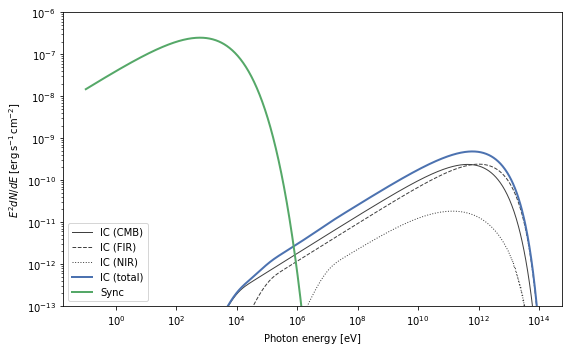

In [10]:
import naima
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

# Define models
ECPL = naima.models.ExponentialCutoffPowerLaw(1e36*u.Unit('1/eV'),
        1*u.TeV, 2.1, 13*u.TeV)
plt.figure(figsize=(8,5))

IC = naima.models.InverseCompton(ECPL, seed_photon_fields=['CMB', 'FIR', 'NIR'])
IC.particle_distribution.index = 1.8
SYN = naima.models.Synchrotron(ECPL, B=100*u.uG)

# Compute SEDs
spectrum_energy = np.logspace(-1,14,1000)*u.eV
sed_IC = IC.sed(spectrum_energy, distance=1.5*u.kpc)
sed_SYN = SYN.sed(spectrum_energy, distance=1.5*u.kpc)

# Plot
plt.figure(figsize=(8,5))
plt.rc('font', family='sans')
plt.rc('mathtext', fontset='custom')
for seed, ls in zip(['CMB', 'FIR', 'NIR'], ['-','--',':']):
    sed = IC.sed(spectrum_energy, seed=seed, distance=1.5*u.kpc)
    plt.loglog(spectrum_energy,sed,lw=1,
            ls=ls,label='IC ({0})'.format(seed),c='0.25')
plt.loglog(spectrum_energy,sed_IC,lw=2,
        label='IC (total)',c=naima.plot.color_cycle[0])
plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync',c=naima.plot.color_cycle[1])
plt.xlabel('Photon energy [{0}]'.format(
        spectrum_energy.unit.to_string('latex_inline')))
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(
        sed_SYN.unit.to_string('latex_inline')))
plt.ylim(1e-13, 1e-6)
plt.tight_layout()
plt.legend(loc='lower left')

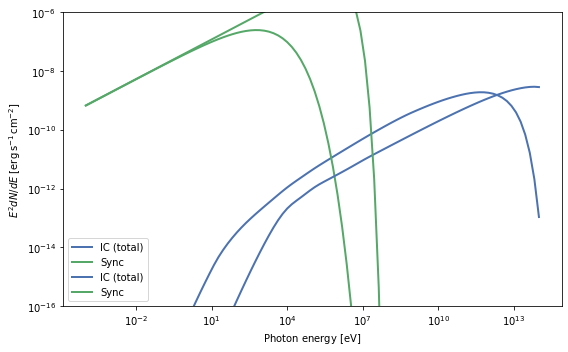

In [35]:
import naima
from naima.models import (ExponentialCutoffPowerLaw,PowerLaw, Synchrotron,
                          InverseCompton)
from astropy.constants import c
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

ECPL = ExponentialCutoffPowerLaw(1e36*u.Unit('1/eV'), 1*u.TeV, 2.1, 13*u.TeV)
EPL = PowerLaw(1e36*u.Unit('1/eV'), 1*u.TeV, 2.1)
SYN = Synchrotron(ECPL, B=100*u.uG)
SYN2 = Synchrotron(EPL, B=100*u.uG)

# Define energy array for synchrotron seed photon field and compute
# Synchroton luminosity by setting distance to 0.
Esy = np.logspace(-6, 6, 100)*u.eV
Lsy = SYN.flux(Esy, distance=0*u.cm)
Lsy2 = SYN2.flux(Esy, distance=0*u.cm)

# Define source radius and compute photon density
R =1* u.pc
phn_sy = Lsy / (4 * np.pi * R**2 * c) * 2.26

R2 =100* u.pc
phn_sy2 = Lsy / (4 * np.pi * R2**2 * c) * 2.26

# Create IC instance with CMB and synchrotron seed photon fields:
IC = InverseCompton(ECPL, seed_photon_fields=['CMB', 'FIR', 'NIR',
                                              ['SSC', Esy, phn_sy]])

IC2 = InverseCompton(EPL, seed_photon_fields=['CMB', 'FIR', 'NIR',
                                              ['SSC', Esy, phn_sy2]])

# Compute SEDs
spectrum_energy = np.logspace(-4,14,100)*u.eV
sed_IC = IC.sed(spectrum_energy, distance=1.5*u.kpc)
sed_SYN = SYN.sed(spectrum_energy, distance=1.5*u.kpc)

sed_IC2 = IC2.sed(spectrum_energy, distance=1.5*u.kpc)
sed_SYN2 = SYN2.sed(spectrum_energy, distance=1.5*u.kpc)

# Plot
plt.figure(figsize=(8,5))
plt.rc('font', family='sans')
plt.rc('mathtext', fontset='custom')
ssc = IC.sed(spectrum_energy, seed='SSC', distance=1.5*u.kpc)
ssc2 = IC2.sed(spectrum_energy, seed='SSC', distance=1.5*u.kpc)
"""plt.loglog(spectrum_energy,ssc,lw=1.5,
        ls='-',label='IC (SSC)',c=naima.plot.color_cycle[2])
for seed, ls in zip(['CMB','FIR','NIR'], ['-','--',':']):
    sed = IC.sed(spectrum_energy, seed=seed, distance=1.5*u.kpc)
    plt.loglog(spectrum_energy,sed,lw=1,
            ls=ls,c='0.25')#,label='IC ({0})'.format(seed))"""

plt.loglog(spectrum_energy,sed_IC,lw=2,
        label='IC (total)',c=naima.plot.color_cycle[0])
plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync',c=naima.plot.color_cycle[1])

plt.loglog(spectrum_energy,sed_IC2,lw=2,
        label='IC (total)',c=naima.plot.color_cycle[0])
plt.loglog(spectrum_energy,sed_SYN2,lw=2,label='Sync',c=naima.plot.color_cycle[1])


plt.xlabel('Photon energy [{0}]'.format(
        spectrum_energy.unit.to_string('latex_inline')))
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(
        sed_SYN.unit.to_string('latex_inline')))
plt.ylim(1e-16, 1e-6)
plt.tight_layout()
plt.legend(loc='lower left')

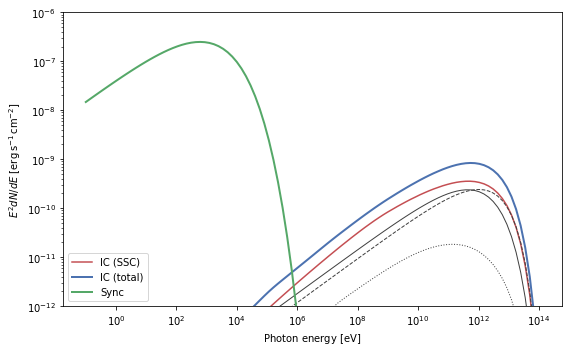

In [5]:
ECPL = ExponentialCutoffPowerLaw(1e36*u.Unit('1/eV'), 1*u.TeV, 2.1, 13*u.TeV)
SYN = Synchrotron(ECPL, B=100*u.uG)

# Define energy array for synchrotron seed photon field and compute
# Synchroton luminosity by setting distance to 0.
Esy = np.logspace(-6, 6, 100)*u.eV
Lsy = SYN.flux(Esy, distance=0*u.cm)

# Define source radius and compute photon density
R = 2 * u.pc
phn_sy = Lsy / (4 * np.pi * R**2 * c) * 2.26

# Create IC instance with CMB and synchrotron seed photon fields:
IC = InverseCompton(ECPL, seed_photon_fields=['CMB', 'FIR', 'NIR',
                                              ['SSC', Esy, phn_sy]])

# Compute SEDs
spectrum_energy = np.logspace(-1,14,100)*u.eV
sed_IC = IC.sed(spectrum_energy, distance=1.5*u.kpc)
sed_SYN = SYN.sed(spectrum_energy, distance=1.5*u.kpc)

# Plot
plt.figure(figsize=(8,5))
plt.rc('font', family='sans')
plt.rc('mathtext', fontset='custom')

ssc = IC.sed(spectrum_energy, seed='SSC', distance=1.5*u.kpc)
plt.loglog(spectrum_energy,ssc,lw=1.5,
        ls='-',label='IC (SSC)',c=naima.plot.color_cycle[2])

for seed, ls in zip(['CMB','FIR','NIR'], ['-','--',':']):
    sed = IC.sed(spectrum_energy, seed=seed, distance=1.5*u.kpc)
    plt.loglog(spectrum_energy,sed,lw=1,
            ls=ls,c='0.25')#,label='IC ({0})'.format(seed))

plt.loglog(spectrum_energy,sed_IC,lw=2,
        label='IC (total)',c=naima.plot.color_cycle[0])
plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync',c=naima.plot.color_cycle[1])
plt.xlabel('Photon energy [{0}]'.format(
        spectrum_energy.unit.to_string('latex_inline')))
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(
        sed_SYN.unit.to_string('latex_inline')))
plt.ylim(1e-12, 1e-6)
plt.tight_layout()
plt.legend(loc='lower left')

In [33]:
#!/usr/bin/env python
import astropy.units as u
import numpy as np
from astropy.io import ascii

import naima
from naima.models import ExponentialCutoffPowerLaw, InverseCompton

## Read data

data = ascii.read("RXJ1713_HESS_2007.dat")


def ElectronIC(pars, data):
    """
    Define particle distribution model, radiative model, and return model flux
    at data energy values
    """

    ECPL = ExponentialCutoffPowerLaw(
        pars[0] / u.eV, 10.0 * u.TeV, pars[1], 10 ** pars[2] * u.TeV
    )
    IC = InverseCompton(ECPL, seed_photon_fields=["CMB"])

    return IC.flux(data, distance=1.0 * u.kpc)


def lnprior(pars):
    # Limit amplitude to positive domain
    logprob = naima.uniform_prior(pars[0], 0.0, np.inf)
    return logprob



## Set initial parameters and labels
p0 = np.array((1e30, 3.0, np.log10(30)))
labels = ["norm", "index", "log10(cutoff)"]

## Run sampler
sampler, pos = naima.run_sampler(
    data_table=data,
    p0=p0,
    labels=labels,
    model=ElectronIC,
    prior=lnprior,
    nwalkers=32,
    nburn=100,
    nrun=20,
    threads=4,
    prefit=True,
    interactive=False,
)
## Save run results
out_root = "RXJ1713_IC_minimal"
naima.save_run(out_root + ".hdf5", sampler)

## Save diagnostic plots and results table
naima.save_diagnostic_plots(out_root, sampler, sed=False)
naima.save_results_table(out_root, sampler)



FileNotFoundError: [Errno 2] No such file or directory: 'RXJ1713_HESS_2007.dat'